In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
# Define simple linear regression model: y = wx + b
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [4]:
# Synthetic dataset: y = 2x
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

In [7]:
# Choose optimizer: "adam" or "sgd"
def train_model(optimizer_name="adam", learning_rate=0.01, momentum=0.9):
    model = LinearModel()
    loss_fn = nn.MSELoss()

    if optimizer_name == "adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == "sgd":
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
    else:
        raise ValueError("Unsupported optimizer")

    loss_history = []
    for epoch in range(100):
        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()

        # Optional: print weights and gradients
        if epoch % 10 == 0:
            print(f"[{optimizer_name.upper()}] Epoch {epoch} | Loss: {loss.item():.4f}")
            print(f"  Weight: {model.linear.weight.data}")
            print(f"  Grad: {model.linear.weight.grad}\n")

        optimizer.step()
        loss_history.append(loss.item())

    return loss_history

[ADAM] Epoch 0 | Loss: 14.8367
  Weight: tensor([[0.3468]])
  Grad: tensor([[-21.0300]])

[ADAM] Epoch 10 | Loss: 12.2013
  Weight: tensor([[0.4464]])
  Grad: tensor([[-19.0368]])

[ADAM] Epoch 20 | Loss: 9.8768
  Weight: tensor([[0.5443]])
  Grad: tensor([[-17.0817]])

[ADAM] Epoch 30 | Loss: 7.8813
  Weight: tensor([[0.6386]])
  Grad: tensor([[-15.1981]])

[ADAM] Epoch 40 | Loss: 6.2102
  Weight: tensor([[0.7282]])
  Grad: tensor([[-13.4123]])

[ADAM] Epoch 50 | Loss: 4.8420
  Weight: tensor([[0.8122]])
  Grad: tensor([[-11.7421]])

[ADAM] Epoch 60 | Loss: 3.7446
  Weight: tensor([[0.8900]])
  Grad: tensor([[-10.1989]])

[ADAM] Epoch 70 | Loss: 2.8820
  Weight: tensor([[0.9615]])
  Grad: tensor([[-8.7888]])

[ADAM] Epoch 80 | Loss: 2.2173
  Weight: tensor([[1.0264]])
  Grad: tensor([[-7.5145]])

[ADAM] Epoch 90 | Loss: 1.7152
  Weight: tensor([[1.0849]])
  Grad: tensor([[-6.3757]])

[SGD] Epoch 0 | Loss: 31.4910
  Weight: tensor([[-0.3107]])
  Grad: tensor([[-30.6850]])

[SGD] Epoch 

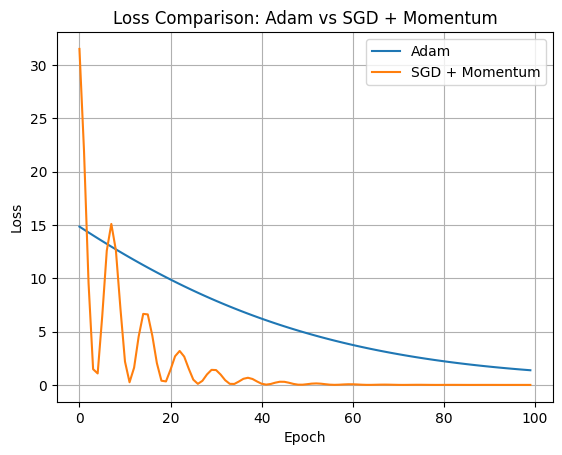

In [8]:
# Train with Adam and SGD + momentum
adam_loss = train_model("adam", learning_rate=0.01)
sgd_loss = train_model("sgd", learning_rate=0.01, momentum=0.9)

# Plot losses
plt.plot(adam_loss, label="Adam")
plt.plot(sgd_loss, label="SGD + Momentum")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison: Adam vs SGD + Momentum")
plt.legend()
plt.grid(True)
plt.savefig("adam_vs_sgd_loss_plot.png")
plt.show()